In [1]:
import sympy as smp

In [2]:
x = smp.symbols('x', real=True)

https://rwdb.xyz/pad%C3%A9-approximations/

In [140]:
def pade(f, x, n, m, leading_denumer=1):
    a = smp.symbols("a:{}".format(n + 1))
    b = smp.symbols("b:{}".format(m + 1))
    P = sum(a[k] * x**k for k in range(n + 1))
    Q = sum(b[k] * x**k for k in range(m + 1)).subs(b[0], leading_denumer)

    expansion = smp.series(f * Q - P, x, n=n + m + 1)
    eqns = [expansion.coeff(x, k) for k in range(n + m + 1)]
    sols = smp.solve(eqns)

    return (P / Q).subs(sols)

In [141]:
def diagonal_pade(f, x, n, *args, **kwargs):
    return pade(f, x, n, n, *args, **kwargs)

In [142]:
d = 6
p = smp.plot(smp.cos(x), ylim=(-1.1, 1.1), label='cos(x)', show=False, legend=True)
p.extend(smp.plot(diagonal_pade(smp.cos(x), x, d), label='Pade', show=False))
p.extend(smp.plot(smp.series(smp.cos(x), n=d).removeO(), label='Taylor', show=False))

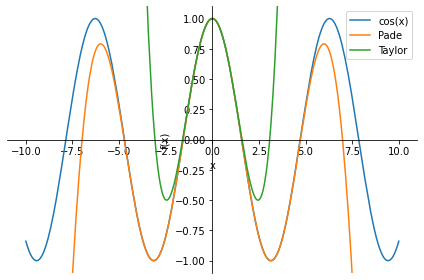

In [143]:
p.show()

In [145]:
diagonal_pade(smp.sin(x), x, 6)

(12671*x**5/4363920 - 2363*x**3/18183 + x)/(121*x**6/16662240 + 601*x**4/872784 + 445*x**2/12122 + 1)